## Step 1. 인물모드 직접 해 보기


In [1]:
#라이브러리 불러오기
import os
import urllib
import cv2
import numpy as np
from pixellib.semantic import semantic_segmentation
from matplotlib import pyplot as plt


# urllib: 웹 데이터 다운
# pixellib: 이미지 및 비디오 segmentation
# pixellib.semantic: semantic segmentation

In [2]:
%pwd

'/aiffel/aiffel'

### 1st Try

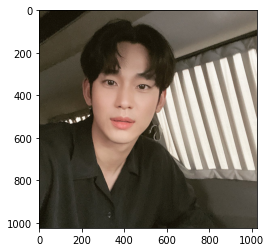

In [3]:
# 이미지 불러오기
first_image_path = 'human_segmentation/images/김수현.jpg'
image_orig_1 = cv2.imread(first_image_path)

def draw_image(image):
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.show()

draw_image(image_orig_1)

In [4]:
# 모델 불러오기
model_dir = os.getenv('HOME')+'/aiffel/human_segmentation/models' 
model_file = os.path.join(model_dir, 'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5')
model_url = 'https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.1/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5'

In [5]:
urllib.request.urlretrieve(model_url, model_file)

('/aiffel/aiffel/human_segmentation/models/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5',
 <http.client.HTTPMessage at 0x79e8b08c53a0>)

In [6]:
model = semantic_segmentation()
model.load_pascalvoc_model(model_file)

In [7]:
#모델에 이미지 입력 

segvalues_1st, output_1st = model.segmentAsPascalvoc(first_image_path)

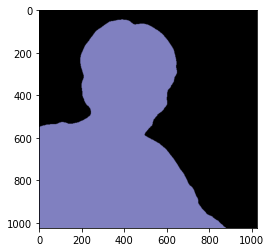

In [8]:
# 출력값 확인
plt.imshow(output_1st)
plt.show()

In [9]:
#검출된 영역 클래스 확인

LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv']

for class_id in segvalues_1st['class_ids']:
    print(LABEL_NAMES[class_id])

background
person


In [10]:
# 컬러맵 얻기
def ext_colormap(label_name):
    colormap = np.zeros((256, 3), dtype = int)
    ind = np.arange(256, dtype=int)

    for shift in reversed(range(8)):
        for channel in range(3):
            colormap[:, channel] |= ((ind >> channel) & 1) << shift ## << 연산, 이진표기 후 이동 (shift)
        ind >>= 3
    
    index = LABEL_NAMES.index(label_name) # 라벨의 인덱스 지정
    seg_color = colormap[index].tolist() # array형태를 list 형태로 변경해서 저장
    seg_color.reverse() # RGB로 변경
    return seg_color
   

(1024, 1024)


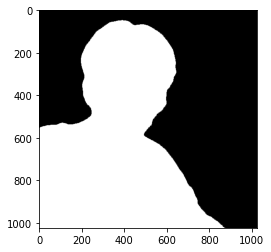

In [11]:
seg_color = ext_colormap('person')
first_seg_map = np.all(output_1st==seg_color, axis=-1) # 3채널 비교해서 모두 일치 하면 true 값 
print(first_seg_map.shape) 
plt.imshow(first_seg_map, cmap='gray')
plt.show()

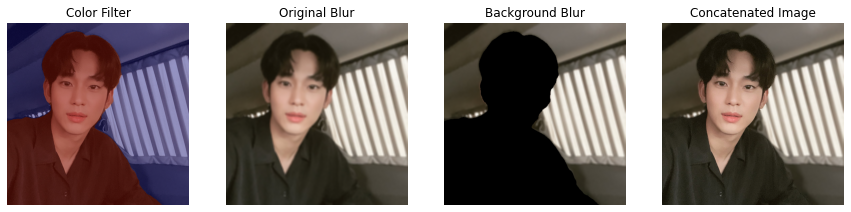

In [12]:
# 마스크 만들고, color로 변경 후, 원본 이미지와 섞어서 출력
def filter_images(img_orig, seg_map):
    img_show = img_orig.copy()
    img_mask = seg_map.astype(np.uint8) * 255  # True = 255 , False = 0
    color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)
    img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)
    
    fig, axs = plt.subplots(1, 4, figsize=(15, 5))
    
    axs[0].imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
    axs[0].set_title('Color Filter')
    axs[0].axis('off')
    
    img_orig_blur = cv2.blur(img_orig, (13,13))
    axs[1].imshow(cv2.cvtColor(img_orig_blur, cv2.COLOR_BGR2RGB))
    axs[1].set_title('Original Blur')
    axs[1].axis('off')
    
    img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)     # 색이 있으면 1(흰색), 없으면 0(검게)
    img_bg_mask = cv2.bitwise_not(img_mask_color)                   # bitwise_not : 색 반전 0은 1로, 1은 0으로
    img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)       # bitwise_and : 모두 1일때만 1로
    axs[2].imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))     
    axs[2].set_title('Background Blur')
    axs[2].axis('off')
    
    img_concat = np.where(img_mask_color==255, img_orig, img_bg_blur)
    axs[3].imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
    axs[3].set_title('Concatenated Image')
    axs[3].axis('off')
    
    return plt.show()

filter_images(image_orig_1, first_seg_map)

### 2nd Try 

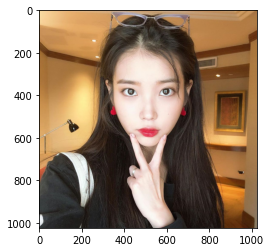

In [13]:
second_image_path = 'human_segmentation/images/이지금.jpg'
image_orig_2 = cv2.imread(second_image_path)

draw_image(image_orig_2)

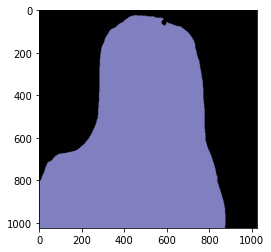

In [14]:
segvalues_2nd, output_2nd = model.segmentAsPascalvoc(second_image_path)
plt.imshow(output_2nd)
plt.show()

(1024, 1024)


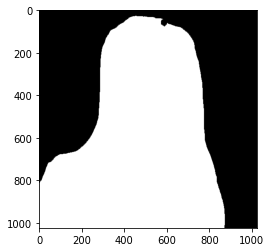

In [15]:
seg_color = ext_colormap('person')
second_seg_map = np.all(output_2nd==seg_color, axis=-1) 
print(second_seg_map.shape) 
plt.imshow(second_seg_map, cmap='gray')
plt.show()

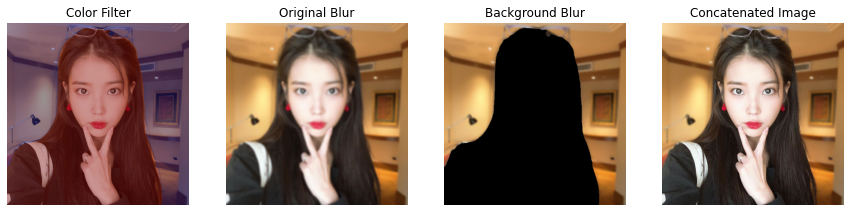

In [16]:
filter_images(image_orig_2, second_seg_map)

### 3rd try

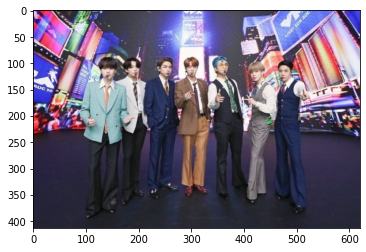

In [17]:
third_image_path = 'human_segmentation/images/bts.jpg'
image_orig_3 = cv2.imread(third_image_path)

draw_image(image_orig_3)

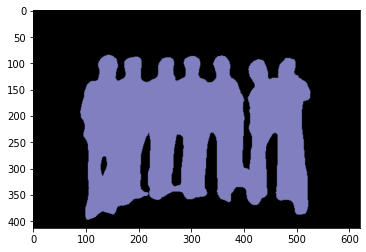

In [18]:
segvalues_3rd, output_3rd = model.segmentAsPascalvoc(third_image_path)
plt.imshow(output_3rd)
plt.show()

(413, 620)


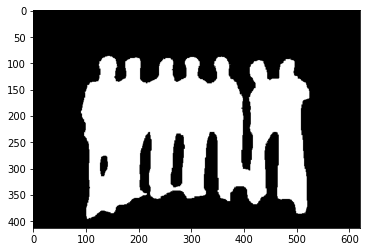

In [19]:
seg_color = ext_colormap('person')
third_seg_map = np.all(output_3rd==seg_color, axis=-1) 
print(third_seg_map.shape) 
plt.imshow(third_seg_map, cmap='gray')
plt.show()

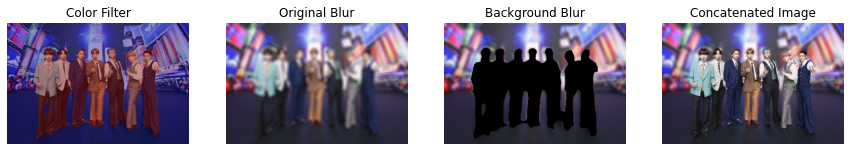

In [20]:
filter_images(image_orig_3, third_seg_map)

### 고양이 사진으로 해보기

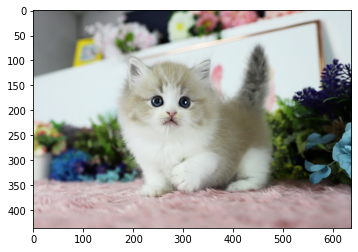

In [21]:
cat_image_path = 'human_segmentation/images/cat.jpg'
image_orig_cat = cv2.imread(cat_image_path)

draw_image(image_orig_cat)

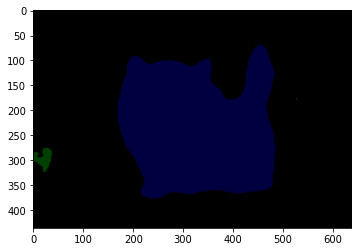

In [22]:
segvalues_cat, output_cat = model.segmentAsPascalvoc(cat_image_path)
plt.imshow(output_cat)
plt.show()

(436, 638)


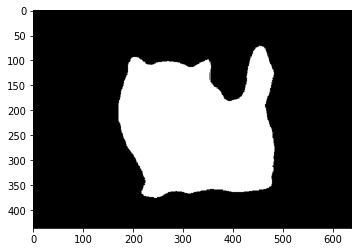

In [23]:
seg_color = ext_colormap('cat')
cat_seg_map = np.all(output_cat==seg_color, axis=-1) 
print(cat_seg_map.shape) 
plt.imshow(cat_seg_map, cmap='gray')
plt.show()

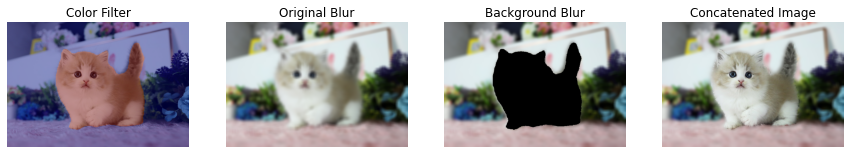

In [24]:
filter_images(image_orig_cat, cat_seg_map)

### 크로마키 배경

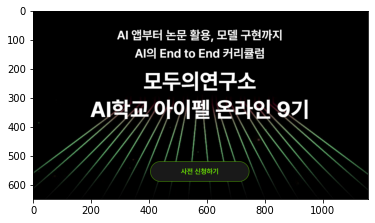

(649, 1157, 3)

In [25]:
background_image_path = 'human_segmentation/images/aiffel_ad.png'
bg_image_orig = cv2.imread(background_image_path)

draw_image(cv2.cvtColor(bg_image_orig, cv2.COLOR_BGR2RGB))
bg_image_orig.shape

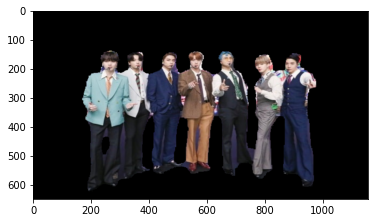

(649, 1157, 3)

In [26]:
# bts만 뽑기
bts_mask = third_seg_map.astype(np.uint8) * 255
bts_c_mask = cv2.cvtColor(bts_mask, cv2.COLOR_GRAY2BGR)
bts = np.where(bts_c_mask == 255, image_orig_3, 0)
bts_resize = cv2.resize(bts, (1157,649))

draw_image(bts_resize)
bts_resize.shape

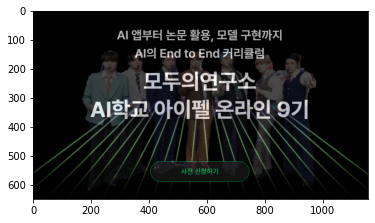

In [27]:
aiffel = cv2.addWeighted(bts_resize, 0.3, bg_image_orig, 0.7, 1)

draw_image(aiffel)

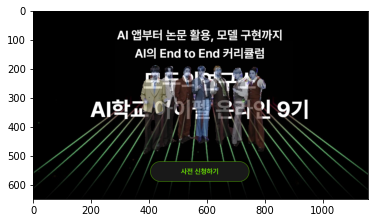

In [28]:
background_aiffel = bg_image_orig.copy()

sticker_area = background_aiffel[100:100+bts.shape[0], 280:280+bts.shape[1]]
background_aiffel[100:100+bts.shape[0], 280:280+bts.shape[1]] = \
cv2.addWeighted(sticker_area, 0.3, np.where(bts==0,sticker_area,bts).astype(np.uint8), 0.7, 1)

draw_image(cv2.cvtColor(background_aiffel, cv2.COLOR_BGR2RGB))

bts = cv2.cvtColor(bts, cv2.COLOR_BGR2RGB)  중간에 넣어줘야지 외계인이 안된다...

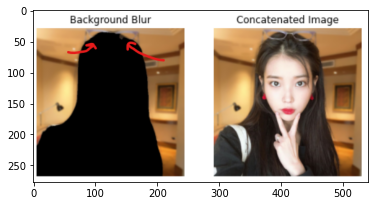

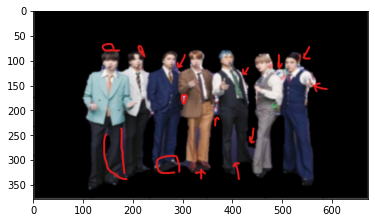

In [33]:
problem_path1 = 'human_segmentation/images/문제점.png'
problem_path2 = 'human_segmentation/images/문제점2.png'

pb1 = cv2.imread(problem_path1)
pb2 = cv2.imread(problem_path2)

draw_image(pb1)
draw_image(pb2)

#### 문제점

1. 안경 같은 소품이 사람이랑 겹쳐 있을 땐, 구분을 잘 못했다.
2. 경계선에서 유의미하게 error가 존재한다. 특히, 주변에 분류에 성공한 픽셀이 많을 수록 경계선을 잘 긋는게 더 어려워 보인다.

-> semantic segmentation의 성능의 한계에서 오는 문제점들이라 볼 수 있다.

### pixellib 조사

1. deeplabv3+ Xception model 사용 
2. 0.7.1 버전에서 기본적으로 segmentation 모델로 Mask R-CNN 사용
3. [PointRend](https://arxiv.org/abs/1912.08193)가 훨씬 더 좋은 segmentation 성능을 보이므로, PointRend가 어떤 변화를 가져왔는지로부터 motivation을 찾아보자.

Mask R-CNN : 픽셀 by 픽셀로 객체의 경계를 예측한다. 각 픽셀에 대해 특정 클래스에 속할 확률과, 해당 픽셀이 객체에 속하는지 여부 출력하고 이를 통해 Mask를 생성한다.

PointRend : 포인트 기반 segmentation을 수행한다. iterative subdivision algorithm 기반으로 선택한 point(특정 위치)를 기반으로 객체의 클래스를 예측함. 

---

### 회고

저번 시간에 못한 cv2.addWeighted를 노드에 있던 코드를 참고해서 적용시키는 데 성공시켰다. 
다른 사람의 코드를 보는 게, 엄청난 효율을 가져오고 공부하는 데도 도움이 많이 되는 걸 느꼈다.
segmentation 기법에 대해 공부할 때 알아야 할 알고리즘을 알게 되었다. (PointRend도 최신 기술임..(2020))
추가적으로 내가 찾은 문제점에 대한 솔루션을 제시해보라고 했는데, segmentation의 문제점을 해결할 수 있는 간단한 해결책은 
시간을 많이 썻지만, 도저히 떠오르지 않았다. 

효율적인 공부에 대해 다시 한번 고민해본 날이었다. 효율 vs 깊이 trade-off 사이에서 아이펠 노드 학습할 때는, 우수한 노드나 코드를 참고해서 넘어가는 것이 좋겠단 판단이 섰다.